In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Se tiene la siguiente función:

\begin{equation}
f(x) = \frac{1}{1 + 25x^2}
\end{equation}


In [12]:
#Dominio de valores
x = np.linspace(-1,1,100)

#La funcion que queremos interpolar vista arriba

def mi_f(valor):
    y =  1/(1+25*(valor)**2)
    return y
    

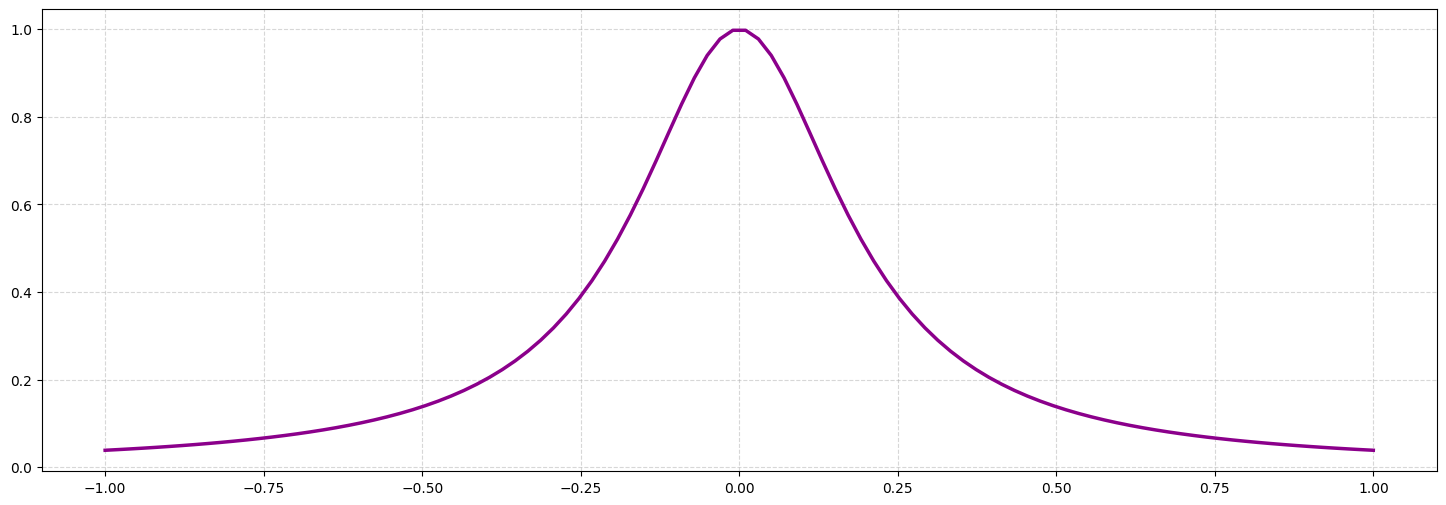

In [53]:
#Grafico de la funcion que queremos interpolar

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(x,mi_f(x),color="darkmagenta",linewidth=2.5)
ax.grid("on",linestyle="dashed",alpha=0.5)

Deseamos interpolar la siguiente función a través del polinomio interpolador N con N+1 numero de datos.

Comenzaremos con n = 5 de modo que tomaremos 6 valores de nuestra funcion. De modo de generar un:

\begin{equation}
    p_5(x) = a_5x^5 + a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0
\end{equation}



In [54]:
#Tomamos un par de valores para realizar la interpolacion

#Valores en x
valores = np.linspace(-1,1,6) #6 puntos entre -1,1

#Valores en Y
y = mi_f(valores)

#Tablita de valores

tabla = pd.DataFrame({"X":valores,"Y":y})
tabla

,X,Y
0,-1.0,0.038462
1,-0.6,0.100000
2,-0.2,0.500000
3,0.2,0.500000
4,0.6,0.100000
5,1.0,0.038462


In [33]:
#Coeficientes del polinomio n = 5
[a5,a4,a3,a2,a1,a0] = np.polyfit(valores,y,5)

In [55]:
#Funcion que calcula los valores del polinomio

def pol(valor):
    y = a5*((valor)**5)+a4*((valor)**4)+a3*((valor)**3)+a2*((valor)**2)+a1*((valor))+a0
    return y

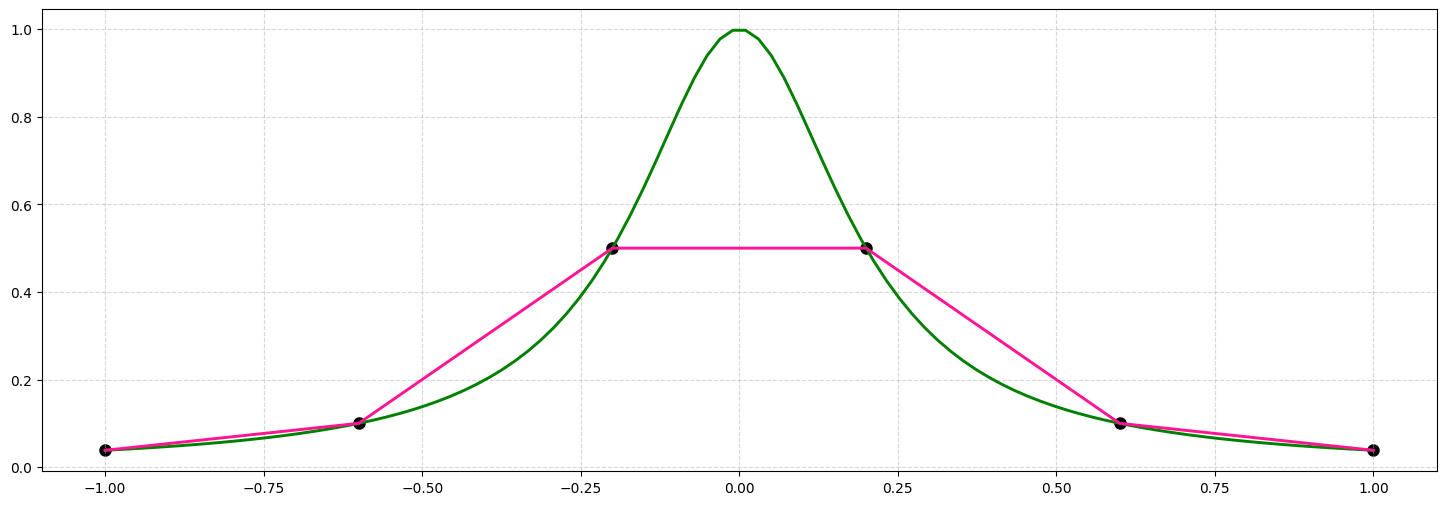

In [56]:
#Grafico

fig, ax = plt.subplots(figsize=(18,6))

#Ploteamos la fucion que deseamos interpolar
ax.plot(x,mi_f(x),color="green",linewidth=2.1)
ax.grid("on",linestyle="dashed",alpha=0.5) #cuadriculado de la hoja

#Puntos que tomamos de la funcion para interpolar
ax.scatter(valores,y,color = "black",linewidth=3) 

#Polinomio interpolador de grado 5
ax.plot(valores,pol(valores),color="deeppink",linewidth=2.1)

Se observa que para n=5 el polinomio tiene problemas. No es una buena aproximación.

In [65]:
#Funcion que devuelve los valores que multiplican a cada coeficiente 
def multiplica_al_coef(x):
    vector = np.array([x**5,x**4,x**3,x**2,x,1])
    return vector

In [79]:
v1 = multiplica_al_coef(-1)
v2 = multiplica_al_coef(-0.6)
v3 = multiplica_al_coef(-0.2)
v4 = multiplica_al_coef(0.2)
v5 = multiplica_al_coef(0.6)
v6 = multiplica_al_coef(1)

#Matriz de vander
A = np.array([v1,v2,v3,v4,v5,v6])

izq = np.transpose(A)@A 
der = np.transpose(A)@y
coef_a_mano = np.linalg.solve(izq,der)


In [87]:
print(coef_a_mano)
print(coeficientes) #VERIFICAR CUENTAS

[-3.13831589e-15  1.20192308e+00  4.37287818e-15 -1.73076923e+00
 -1.23150845e-15  5.67307692e-01]
[-5.78489262e-15  1.20192308e+00  6.90593490e-15 -1.73076923e+00
 -1.19427329e-15  5.67307692e-01]
